For comptaility with explainable-ai-sdk

In [1]:
# !pip3 install numpy==1.18.0

In [2]:
import explainable_ai_sdk

In [3]:
PROJECT_ID=!gcloud config get-value project

print(PROJECT_ID)

['kubeflow-1-0-2']


In [4]:
project_name = PROJECT_ID[0]
model_name = "fire_detection"
model_version = "xrai"
region = 'us-central1'

In [5]:
remote_ig_model = explainable_ai_sdk.load_model_from_ai_platform(
                                                                 project=project_name,
                                                                 model=model_name,
                                                                 version=model_version,
                                                                 region=region
                                                                )

In [6]:
instances = [
               {
                "filenames": "gs://fire_detection_anurag/test_images/fire1.jpg"
               },
               {
                "filenames": "gs://fire_detection_anurag/test_images/fire2.jpg"
               },
               {
                "filenames": "gs://fire_detection_anurag/test_images/fire3.jpg"
               },
               {
                "filenames": "gs://fire_detection_anurag/test_images/fire4.jpg"
               },
               {
                "filenames": "gs://fire_detection_anurag/test_images/fire5.jpg"
               }
            ]

In [7]:
ig_response = remote_ig_model.explain(instances)

Example Score: 0.9865
Baseline Score: 0.9930
Approximation Error: 31.2343


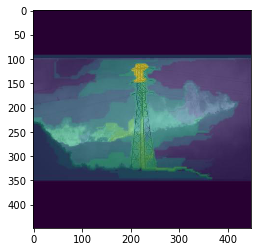

Example Score: 0.7349
Baseline Score: 0.9930
Approximation Error: 0.3746


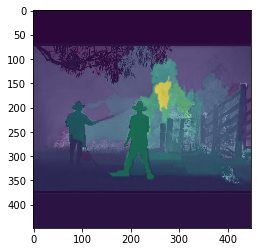

Example Score: 0.9199
Baseline Score: 0.9930
Approximation Error: 6.6736


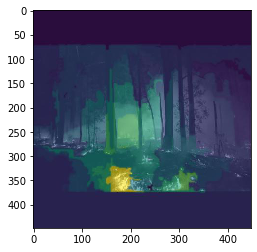

Example Score: 0.9642
Baseline Score: 0.9930
Approximation Error: 7.4806


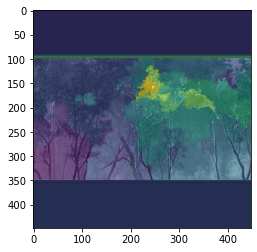

Example Score: 0.9825
Baseline Score: 0.9930
Approximation Error: 2.4230


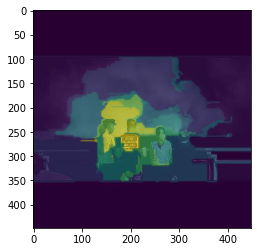

In [8]:
for response in ig_response:
    response.visualize_attributions()